## Link of used dataset:
https://www.kaggle.com/datasets/mahdimashayekhi/disease-risk-from-daily-habits

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
pd.set_option('display.max_columns', None)

## Download data and examine

In [2]:
health_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/health_lifestyle_classification.csv")
health_df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


In [3]:
health_df.shape

(100000, 48)

In [4]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

In [5]:
health_df.isnull().sum().sort_values()

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
bmi_estimated,0
bmi_scaled,0
bmi_corrected,0
waist_size,0


## A new dataframe: inference about columns

In [6]:
def smart_round(x):
    return float(f"{x:.5f}".rstrip("0").rstrip("."))

variable_name = []
total_entry = []
missing_entry = []
missing_ratio = []
data_type = []
unique_values = []
max_value = []
min_value = []

for col in health_df.columns:
  variable_name.append(col)
  total_entry.append(health_df[col].shape[0])
  missing_entry.append(health_df[col].isnull().sum())
  missing_ratio.append(missing_entry[-1]/total_entry[-1])
  if health_df[col].dtype=='int':
      max_value.append(health_df[col].max())
      min_value.append(health_df[col].min())
  else:
    try:
      health_df[col] = health_df[col].astype(float)
      max_value.append(smart_round(health_df[col].max()))
      min_value.append(smart_round(health_df[col].min()))
    except:
      health_df[col] = health_df[col].astype(object)
      max_value.append("-")
      min_value.append("-")
  data_type.append(health_df[col].dtype)
  unique_values.append(health_df[col].unique())

data_info_df = pd.DataFrame({
    "Variable":variable_name,
    "Total Entry":total_entry,
    "Missing Value":missing_entry,
    "Missing Ratio":missing_ratio,
    "Data Type":data_type,
    "Unique Values":unique_values,
    "# Unique Values":list(map(len, unique_values)),
    "Max Values":max_value,
    "Min Values":min_value,
})

data_info_df = data_info_df.sort_values(by="Missing Value",ascending=False)
data_info_df # int olanlar int olarak kalmalı

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values
22,alcohol_consumption,100000,42387,0.42387,object,"[nan, Regularly, Occasionally]",3,-,-
40,caffeine_intake,100000,33261,0.33261,object,"[Moderate, High, nan]",3,-,-
34,exercise_type,100000,24969,0.24969,object,"[Strength, Cardio, Mixed, nan]",4,-,-
14,insulin,100000,15836,0.15836,float64,"[nan, 10.131597441685196, 18.733179433216204, ...",84165,35.46475,-6.79448
11,heart_rate,100000,14003,0.14003,float64,"[60.74982466991912, 66.46369626262035, 76.0432...",85998,114.13604,34.74509
44,gene_marker_flag,100000,10474,0.10474,float64,"[1.0, nan]",2,1.0,1.0
32,income,100000,8470,0.08470,float64,"[6759.82171934488, 6240.517689877877, 3429.179...",87873,12029.40935,500.0
19,daily_steps,100000,8329,0.08329,float64,"[13320.942594565737, 11911.201400998543, 2974....",90935,18064.96954,1000.0
10,blood_pressure,100000,7669,0.07669,float64,"[118.26425414158744, 117.9179857675427, 123.07...",92332,184.4392,59.12817
6,bmi_estimated,100000,0,0.00000,float64,"[18.915925255480552, 36.71627770033372, 25.673...",99996,59.23479,9.98849


## Download the data, son that we can make changes on it

In [7]:
data_info_df.to_csv("data_info.csv", index=False, encoding="utf-8")

## To do list:

*   Variable Structures' will be determined
*   Data Type will be adjusted



## **Make sure everything is okay before continuing**

In [7]:
data_info_df = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/data info - Sayfa1.csv")
data_info_df.head()

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio


In [9]:
data_info_df["Data Type"].value_counts()

,count
Data Type,
float64,24
object,18
int64,6


In [10]:
data_info_df[data_info_df["Data Type"]=='int64'] # bazı unique value tipleri ve variable structure'lar uyuşmamakta

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
11,survey_code,100000,0,0.0,int64,[ 1 2 3 ... 99998 99999 100000],100000,100000,1,Index
13,age,100000,0,0.0,int64,[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 ...,62,79,18,Cardinal
26,stress_level,100000,0,0.0,int64,[ 2 3 0 10 9 7 6 5 1 4 8],11,10,0,Ordinal
27,mental_health_score,100000,0,0.0,int64,[ 8 9 1 4 7 6 2 3 5 0 10],11,10,0,Ordinal
40,meals_per_day,100000,0,0.0,int64,[5 4 1 2 3],5,5,1,Ordinal
44,electrolyte_level,100000,0,0.0,int64,[0],1,0,0,Single


In [11]:
data_info_df["Variable Structure"].value_counts()

,count
Variable Structure,
Continuous-Ratio,21
Ordinal,11
Nominal,11
Single,2
Index,1
Cardinal,1
Continuous-Interval,1


In [12]:
data_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Variable            48 non-null     object 
 1   Total Entry         48 non-null     int64  
 2   Missing Value       48 non-null     int64  
 3   Missing Ratio       48 non-null     float64
 4   Data Type           48 non-null     object 
 5   Unique Values       48 non-null     object 
 6   # Unique Values     48 non-null     int64  
 7   Max Values          48 non-null     object 
 8   Min Values          48 non-null     object 
 9   Variable Structure  48 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.9+ KB


Index is survey_code, which we will not use in our model. Single represents columns with only one value, which are also will not be used.

Text(0.5, 1.0, 'Target Count Graph')

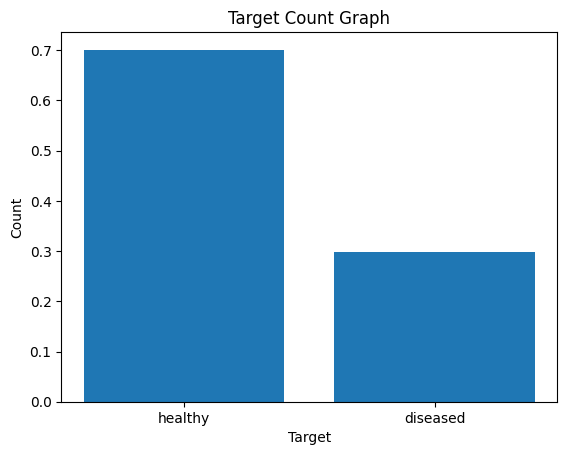

In [13]:
counts = health_df['target'].value_counts(normalize=True)
plt.bar(counts.index, counts.values)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Target Count Graph")

## Examining Alcohol Consumption

In [14]:
health_df['alcohol_consumption'].value_counts()

,count
alcohol_consumption,
Occasionally,28831
Regularly,28782


In [15]:
def mapping(alc):
  if alc=="Occasionally":
    return 1
  elif alc=="Regularly":
    return 2
  else:
    return 0
temp_df = pd.DataFrame({})
temp_df['alcohol_consumption'] = health_df['alcohol_consumption'].apply(mapping)
temp_df["gene_marker_flag"] = health_df['gene_marker_flag'].map({1:1,None:0})
temp_df["target"] = health_df['target']

In [16]:
pd.crosstab(temp_df["alcohol_consumption"],temp_df["target"], normalize=True)
# Imputation Kullanılacak, boş değerleri doldurmak adına

target,diseased,healthy
alcohol_consumption,,
0,0.12847,0.29540
1,0.08552,0.20279
2,0.08504,0.20278


In [17]:
pd.crosstab(temp_df["gene_marker_flag"],temp_df["target"], normalize=True)

target,diseased,healthy
gene_marker_flag,,
0,0.03078,0.07396
1,0.26825,0.62701


## Viewing correlation

<Axes: >

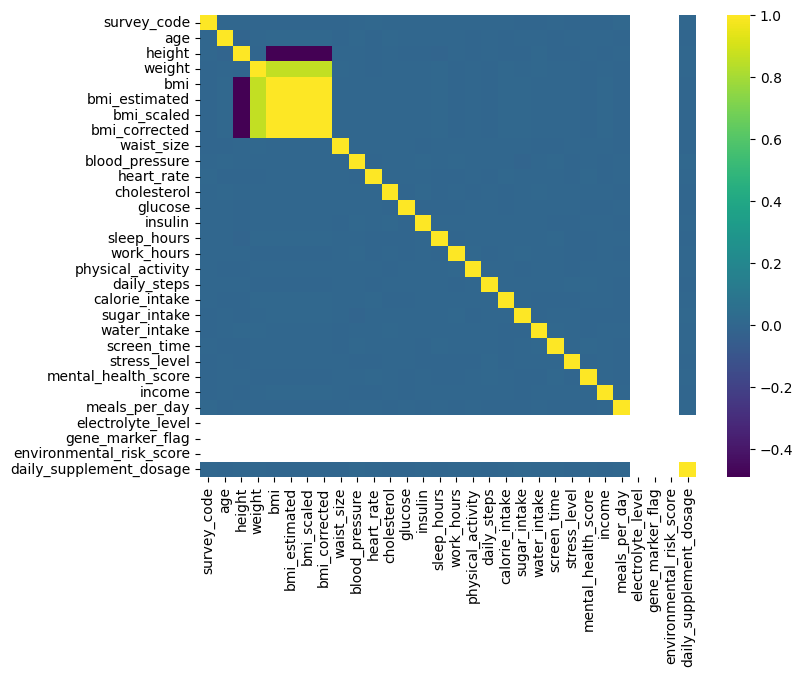

In [18]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')
# bmi lardan biri seçilecek ve onun üzerinden ilerlenecek

## Drop highly correlated columns

In [19]:
hcc = ["bmi_estimated","bmi_scaled","bmi_corrected"]
if all(col in health_df.columns for col in hcc):
    health_df = health_df.drop(columns=hcc) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
       'daily_supplement_dosage', 'target'],
      dtype='object')


## Drop Single value columns

In [20]:
columns_to_drop = ["electrolyte_level", "environmental_risk_score","gene_marker_flag"]
if all(col in health_df.columns for col in columns_to_drop):
    health_df = health_df.drop(columns=columns_to_drop) # main df changed
    print("Dropped specified columns.")
else:
    print("Not all specified columns were present.")
print(health_df.columns)

Dropped specified columns.
Index(['survey_code', 'age', 'gender', 'height', 'weight', 'bmi', 'waist_size',
       'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin',
       'sleep_hours', 'sleep_quality', 'work_hours', 'physical_activity',
       'daily_steps', 'calorie_intake', 'sugar_intake', 'alcohol_consumption',
       'smoking_level', 'water_intake', 'screen_time', 'stress_level',
       'mental_health_score', 'mental_health_support', 'education_level',
       'job_type', 'occupation', 'income', 'diet_type', 'exercise_type',
       'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure',
       'meals_per_day', 'caffeine_intake', 'family_history', 'pet_owner',
       'daily_supplement_dosage', 'target'],
      dtype='object')


In [21]:
health_df.shape

(100000, 42)

<Axes: >

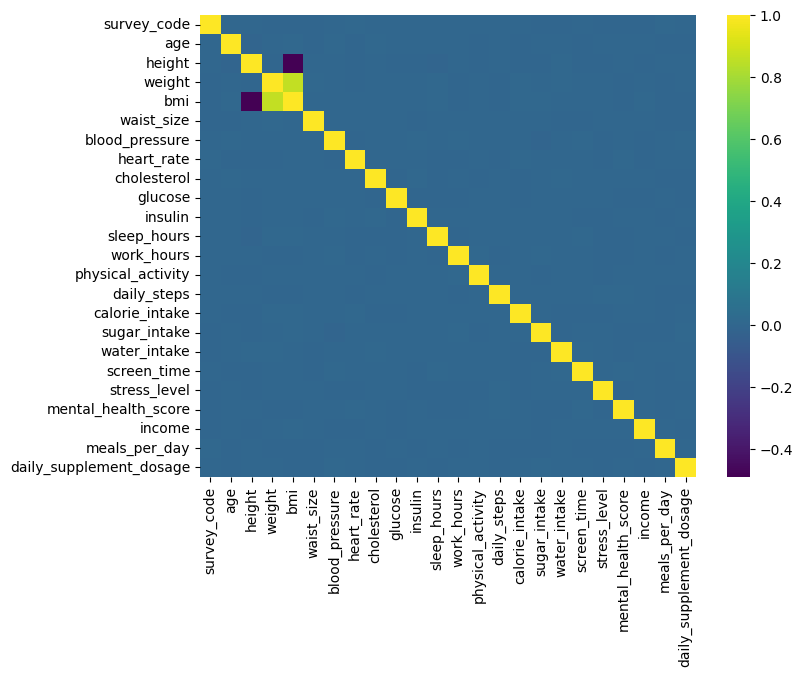

In [22]:
health_df_numeric = health_df.select_dtypes(include=[np.number])
corr_matrix = health_df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis')

## Correlation between null values

<Axes: >

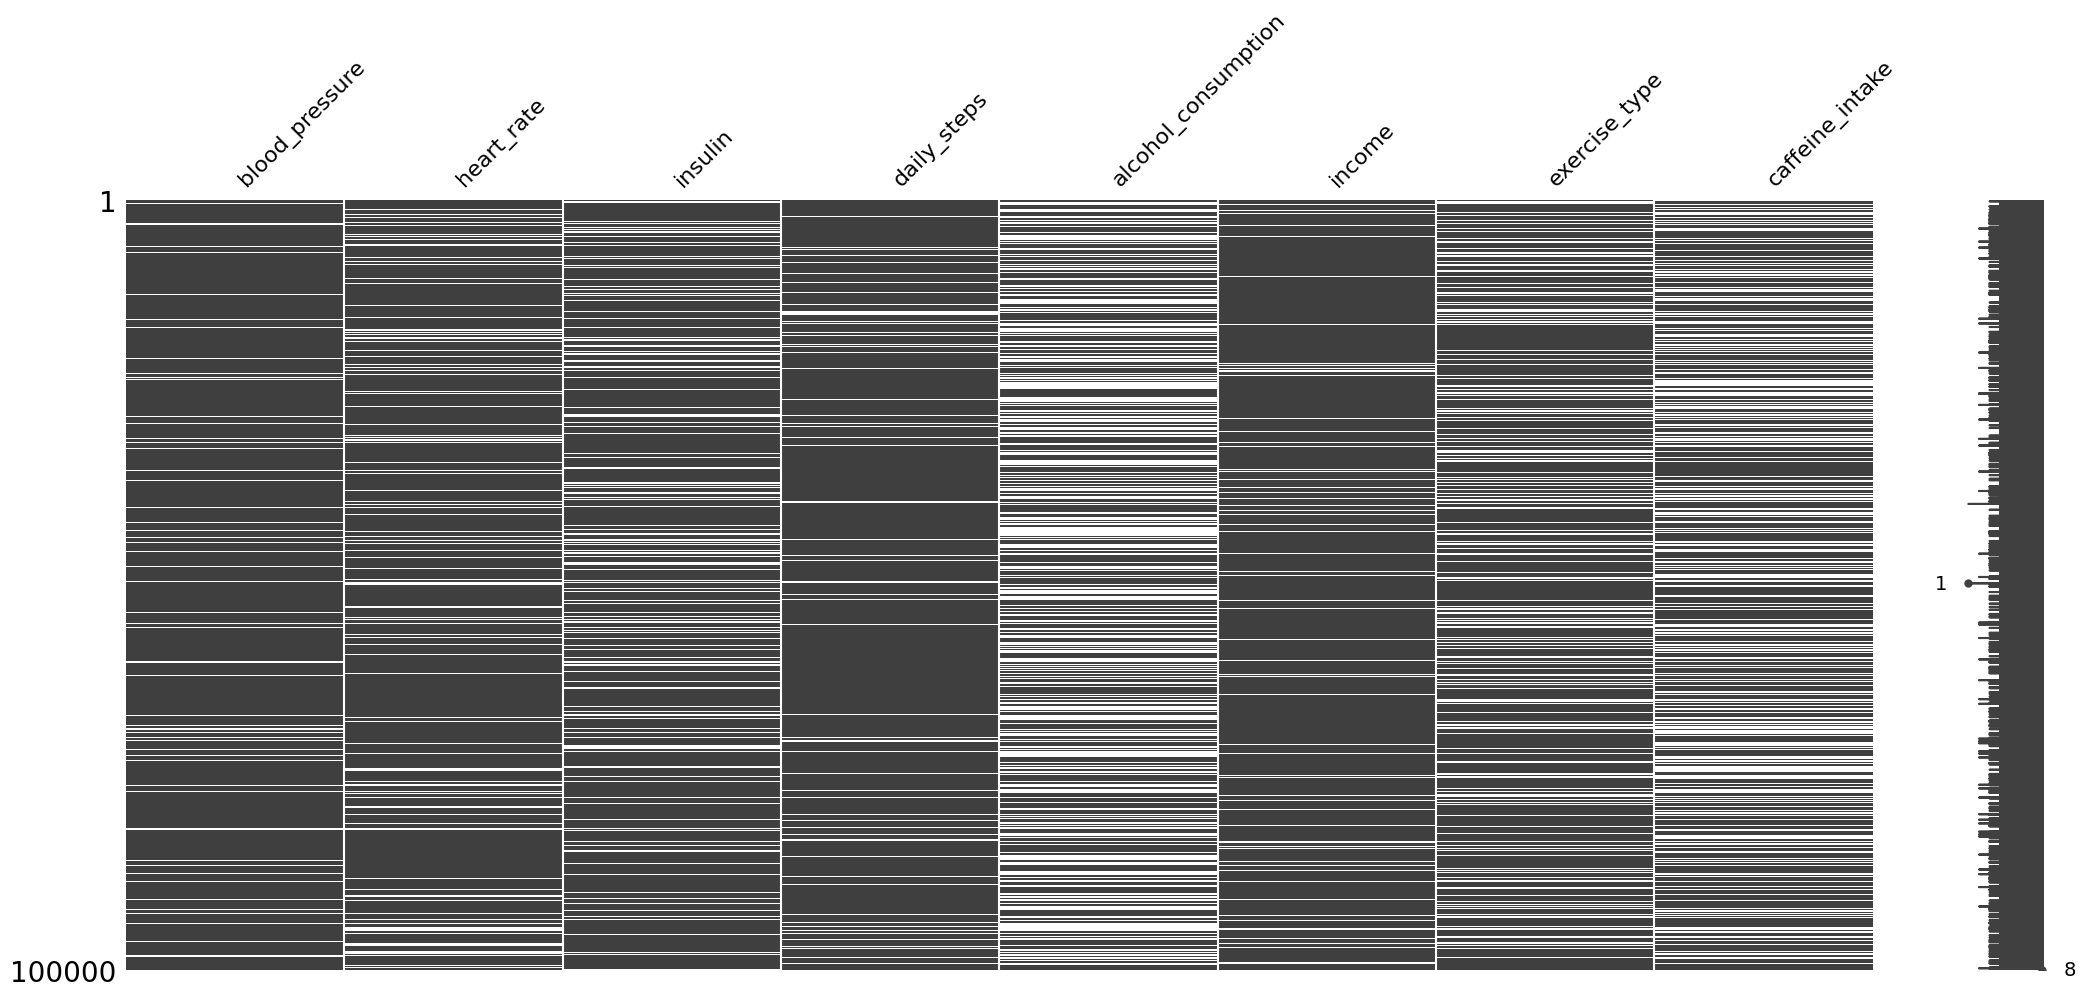

In [23]:
null_df = health_df[[col for col in health_df.columns if health_df[col].isnull().sum()>0]]
msno.matrix(null_df)

we could not see any close correlation of values between features with null values.

## Data Visualization(density graphs)

In [24]:
health_df_continuous_columns = data_info_df[data_info_df['Variable Structure'].str.contains("Continuous") | data_info_df['Variable Structure'].str.contains("Cardinal")]["Variable"]
health_df_continuous_columns = [i for i in health_df_continuous_columns if i in health_df.columns]
print(health_df_continuous_columns)
print("length:",len(health_df_continuous_columns))

['insulin', 'heart_rate', 'income', 'daily_steps', 'blood_pressure', 'weight', 'age', 'height', 'sleep_hours', 'glucose', 'cholesterol', 'waist_size', 'bmi', 'work_hours', 'water_intake', 'screen_time', 'physical_activity', 'calorie_intake', 'sugar_intake', 'daily_supplement_dosage']
length: 20


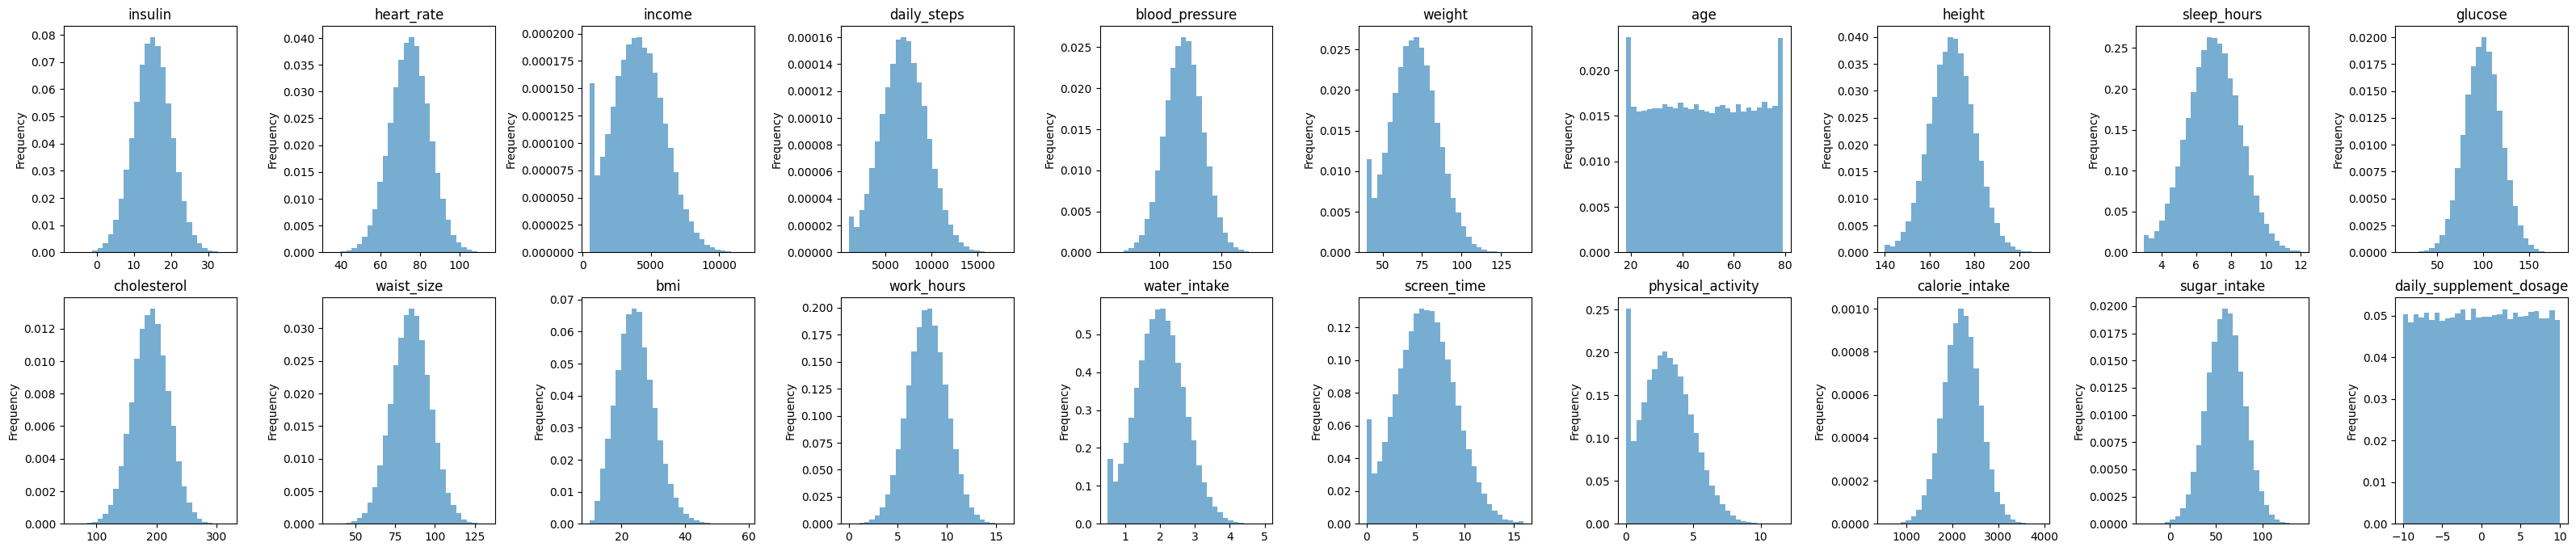

In [25]:
# for continuous/cardinal columns
fig, axs = plt.subplots(2, 10, figsize=(40, 8))
axs = axs.flatten()

for ax, col in zip(axs, health_df_continuous_columns):
    health_df[col].plot(kind="hist", density=True, bins=30, alpha=0.6, ax=ax)
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5)

In [26]:
health_df_categorical_columns = data_info_df[data_info_df['Variable Structure'].str.contains("Ordinal") | data_info_df['Variable Structure'].str.contains("Nominal")]["Variable"]
health_df_categorical_columns = [i for i in health_df_categorical_columns if i in health_df.columns]
print(health_df_categorical_columns)
print("Length:",len(health_df_categorical_columns))

['alcohol_consumption', 'caffeine_intake', 'exercise_type', 'gender', 'sleep_quality', 'stress_level', 'mental_health_score', 'smoking_level', 'occupation', 'job_type', 'education_level', 'mental_health_support', 'healthcare_access', 'insurance', 'diet_type', 'device_usage', 'meals_per_day', 'sunlight_exposure', 'pet_owner', 'family_history', 'target']
Length: 21


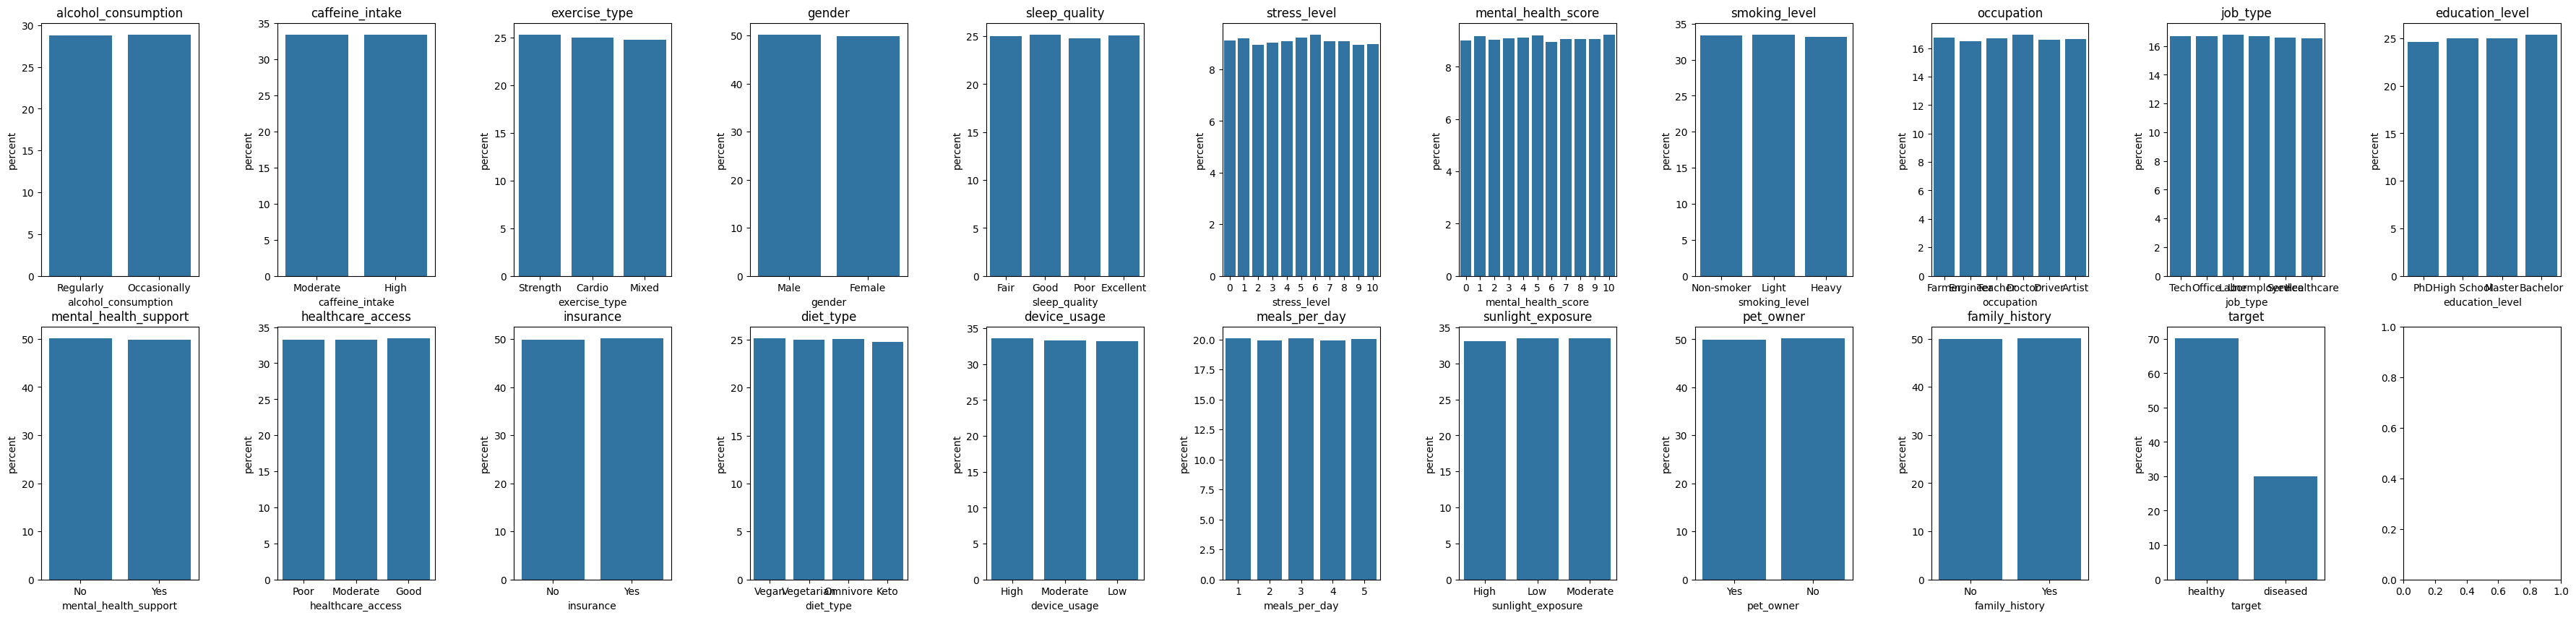

In [27]:
# for categorical values
fig, axs = plt.subplots(2, 11, figsize=(45, 10))
axs = axs.flatten()

for ax, col in zip(axs, health_df_categorical_columns):
    sns.countplot(
        x=col,
        data=health_df,
        stat="percent",
        ax=ax
    )
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5) # renklendirme yap
# yükseklik önemli değil, dataları kendi içinde sırala

## Train-Validation-Test split

In [28]:
# bu kısmı atlama
# train valid test için target dengesi lazım
X = health_df.drop(columns="target")
y = health_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (80000, 41)
X_test: (20000, 41)
y_train: (80000,)
y_test: (20000,)


In [29]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

target
healthy     0.70097
diseased    0.29903
Name: proportion, dtype: float64
target
healthy     0.700975
diseased    0.299025
Name: proportion, dtype: float64
target
healthy     0.70095
diseased    0.29905
Name: proportion, dtype: float64


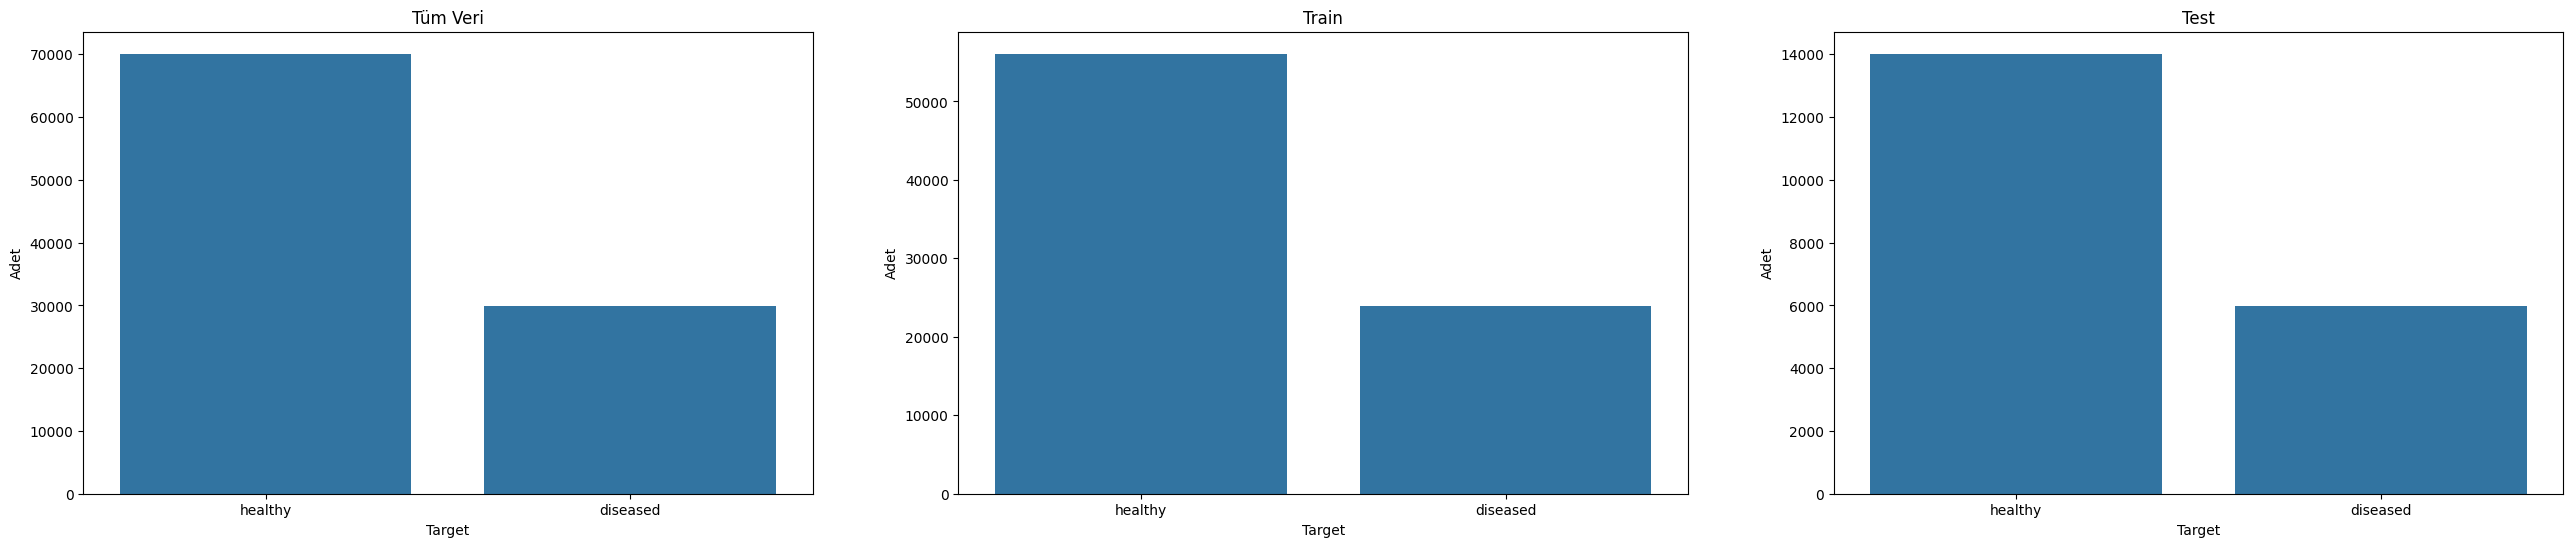

In [30]:
# count gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

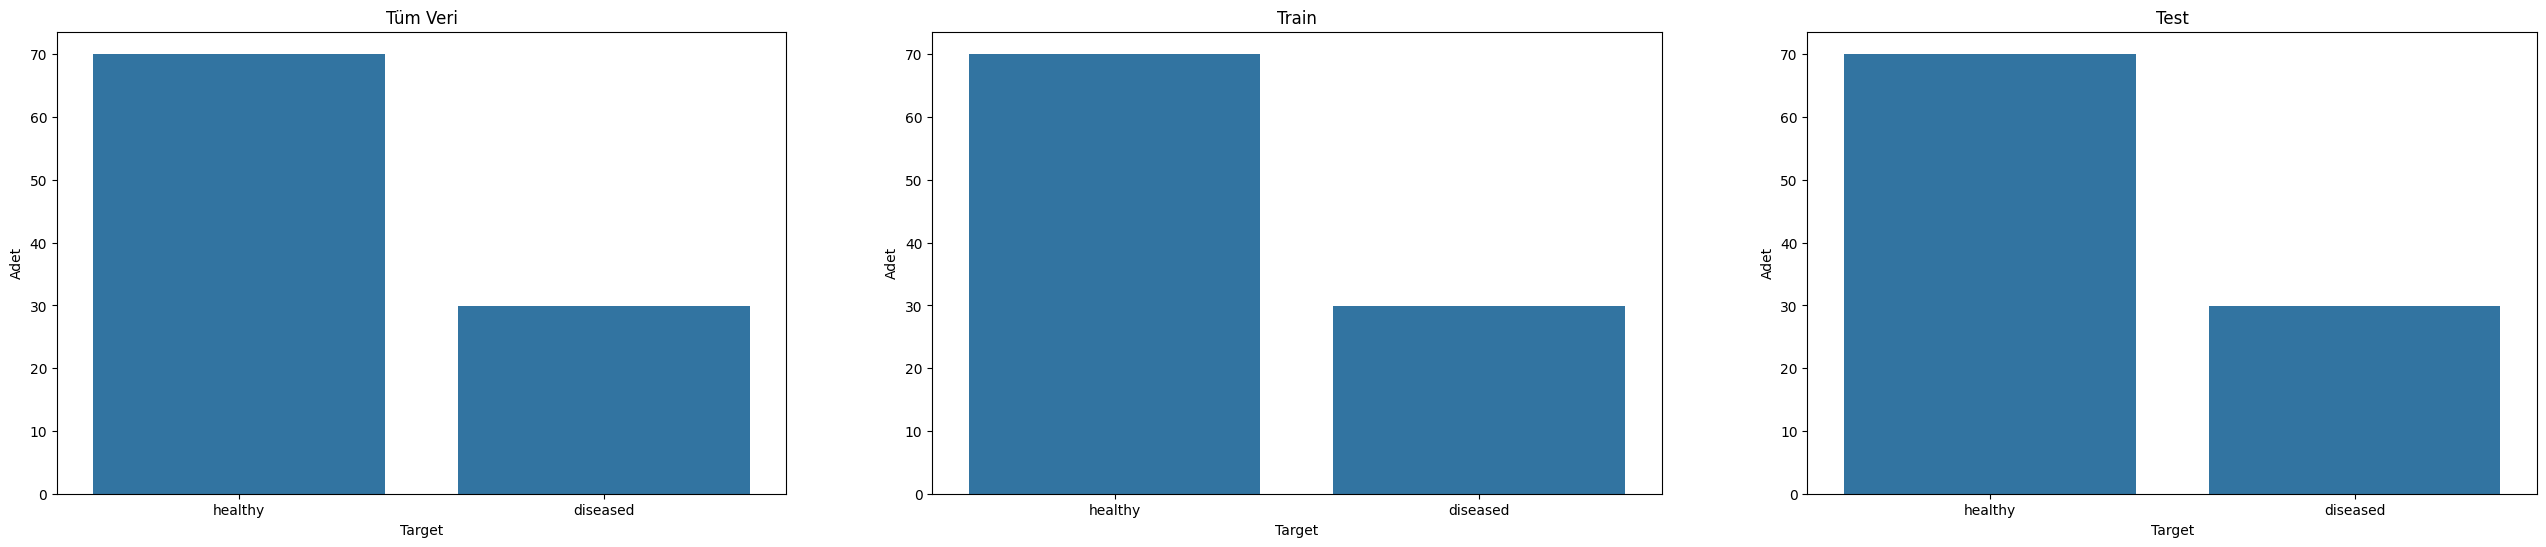

In [31]:
# yüzde gösterimi
fig, axs = plt.subplots(1, 3, figsize=(32, 6))

datasets = [y, y_train, y_test]
titles = ["Tüm Veri", "Train", "Test"]

for ax, data, title in zip(axs, datasets, titles):
    sns.countplot(x=data, ax=ax, stat="percent")
    ax.set_title(title)
    ax.set_xlabel("Target")
    ax.set_ylabel("Adet")

Save Train Test Data

In [32]:
X_train.to_csv("X_train.csv", index=True)
X_test.to_csv("X_test.csv", index=True)
y_train.to_csv("y_train.csv", index=True)
y_test.to_csv("y_test.csv", index=True)

# Outlier Handling

download data

In [3]:
X_train = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/X_train.csv", index_col=0)
X_test = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/X_test.csv", index_col=0)
y_train = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/y_train.csv", index_col=0)
y_test = pd.read_csv("/content/drive/MyDrive/Dokümantasyon/7. Hafta/Main Project: Health Analysis/y_test.csv", index_col=0)

https://www.geeksforgeeks.org/data-analysis/what-is-outlier-detection/

Z = (X - avg(X)) / std(X)

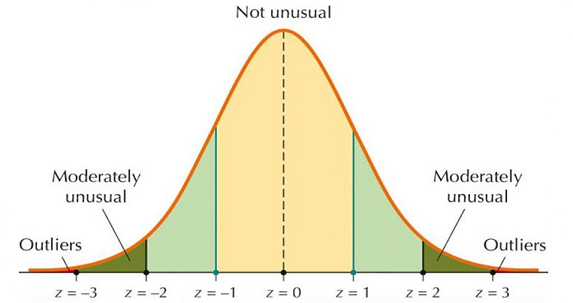

### weight

<Axes: ylabel='Frequency'>

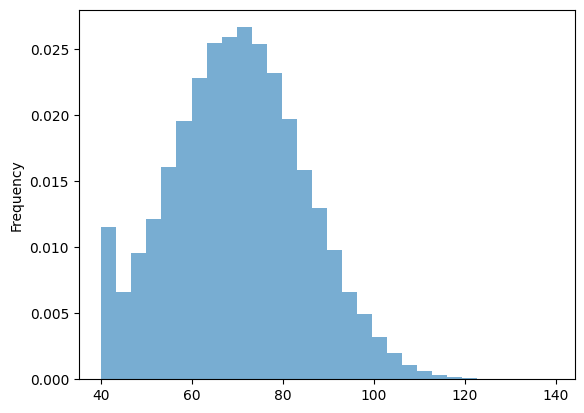

In [34]:
X_train["weight"].plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='weight'>

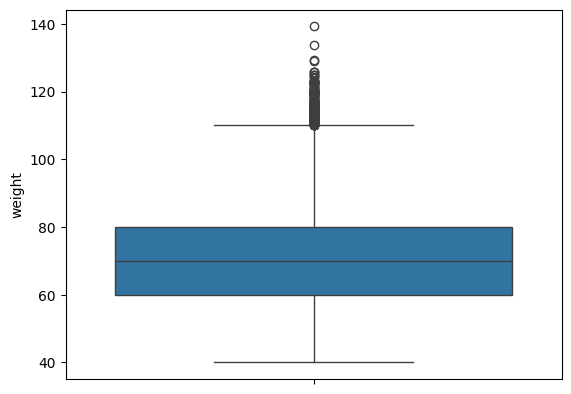

In [35]:
sns.boxplot(data=X_train["weight"])

In [36]:
X_train["weight"].describe()

,weight
count,80000.000000
mean,70.072311
std,14.696609
min,40.000000
25%,59.871369
50%,69.944268
75%,79.998244
max,139.250894


In [37]:
IQR = X_train["weight"].describe()["75%"] - X_train["weight"].describe()["25%"]
L = X_train["weight"].describe()["25%"] - 1.5 * IQR
U = X_train["weight"].describe()["75%"] + 1.5 * IQR
print(L,U)

29.681057936081046 110.18855494095577


In [38]:
print("L den küçük veri sayısı:",X_train[X_train["weight"]<L].shape[0])
print("U dan büyük veri sayısı:",X_train[X_train["weight"]>U].shape[0])

L den küçük veri sayısı: 0
U dan büyük veri sayısı: 271


Gemini recommended me to analyze the data one by one and i did, we ended up not to touch anthing because the data seems to have no overdiscriminated outliers.

### income

<Axes: ylabel='Frequency'>

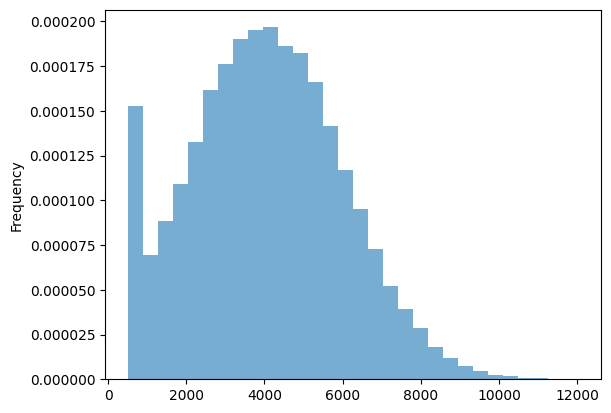

In [39]:
X_train["income"].plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='income'>

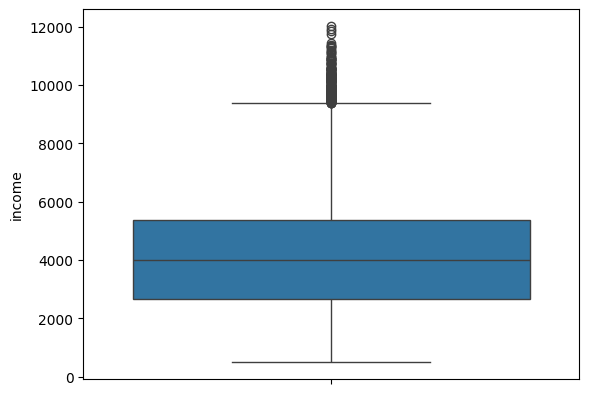

In [40]:
sns.boxplot(data=X_train["income"])

In [41]:
X_train["income"].describe()

,income
count,73226.000000
mean,4040.553673
std,1928.680216
min,500.000000
25%,2668.233773
50%,4007.397738
75%,5359.035318
max,12029.409353


In [42]:
IQR = X_train["income"].describe()["75%"] - X_train["income"].describe()["25%"]
L = X_train["income"].describe()["25%"] - 1.5 * IQR
U = X_train["income"].describe()["75%"] + 1.5 * IQR
print(L,U)

-1367.968544343696 9395.237635219204


In [43]:
print("L den küçük veri sayısı:",X_train[X_train["income"]<L].shape[0])
print("U dan büyük veri sayısı:",X_train[X_train["income"]>U].shape[0])

L den küçük veri sayısı: 0
U dan büyük veri sayısı: 255


### screen_time

<Axes: ylabel='Frequency'>

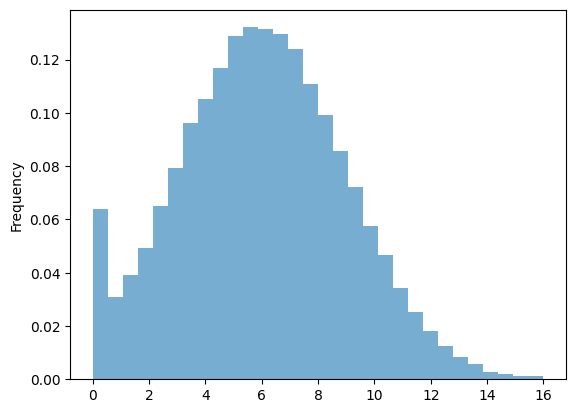

In [44]:
X_train["screen_time"].plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='screen_time'>

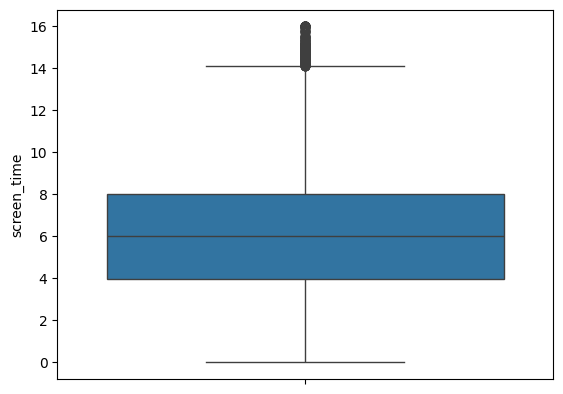

In [45]:
sns.boxplot(data=X_train["screen_time"])

In [46]:
X_train["screen_time"].describe()

,screen_time
count,80000.000000
mean,6.022431
std,2.933638
min,0.000000
25%,3.975085
50%,5.993183
75%,8.021477
max,16.000000


In [47]:
IQR = X_train["screen_time"].describe()["75%"] - X_train["screen_time"].describe()["25%"]
L = X_train["screen_time"].describe()["25%"] - 1.5 * IQR
U = X_train["screen_time"].describe()["75%"] + 1.5 * IQR
print(L,U)

-2.0945026201404806 14.091064795074585


In [48]:
print("L den küçük veri sayısı:",X_train[X_train["screen_time"]<L].shape[0])
print("U dan büyük veri sayısı:",X_train[X_train["screen_time"]>U].shape[0])

L den küçük veri sayısı: 0
U dan büyük veri sayısı: 266


günde 14 saatten fazla ekran süresi olanların sayısı 266. ben de bir zamanlar bu derece yüksek sayılara ulaşıyordum ama outlier olduğunu düşünmüyorum. üst düzey koşullar, ama çıkarılmayı hak etmiyor.

### water_intake

<Axes: ylabel='Frequency'>

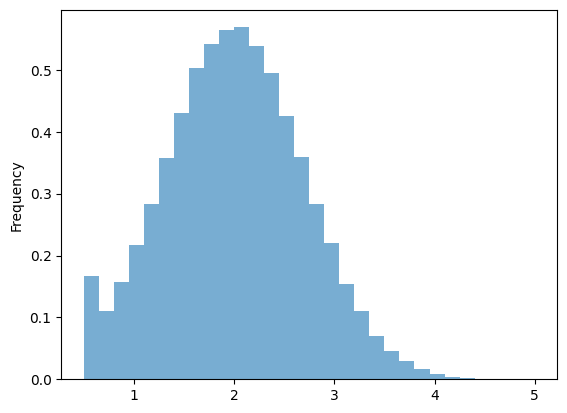

In [49]:
X_train["water_intake"].plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='water_intake'>

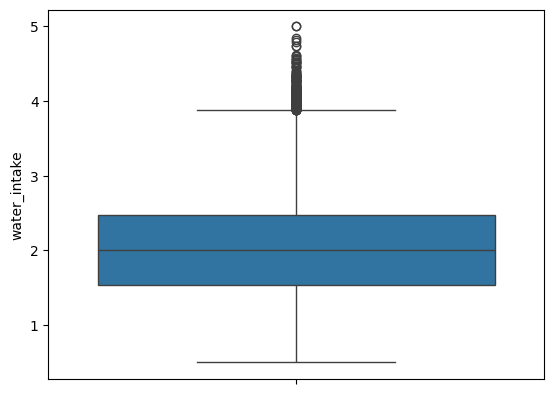

In [50]:
sns.boxplot(data=X_train["water_intake"])

In [51]:
X_train["water_intake"].describe()

,water_intake
count,80000.000000
mean,2.005767
std,0.687502
min,0.500000
25%,1.532264
50%,2.000081
75%,2.471788
max,5.000000


In [52]:
IQR = X_train["water_intake"].describe()["75%"] - X_train["water_intake"].describe()["25%"]
L = X_train["water_intake"].describe()["25%"] - 1.5 * IQR
U = X_train["water_intake"].describe()["75%"] + 1.5 * IQR
print(L,U)

0.12297859424668234 3.881073430346469


In [53]:
print("L den küçük veri sayısı:",X_train[X_train["water_intake"]<L].shape[0])
print("U dan büyük veri sayısı:",X_train[X_train["water_intake"]>U].shape[0])

L den küçük veri sayısı: 0
U dan büyük veri sayısı: 273


### physical_activity

<Axes: ylabel='Frequency'>

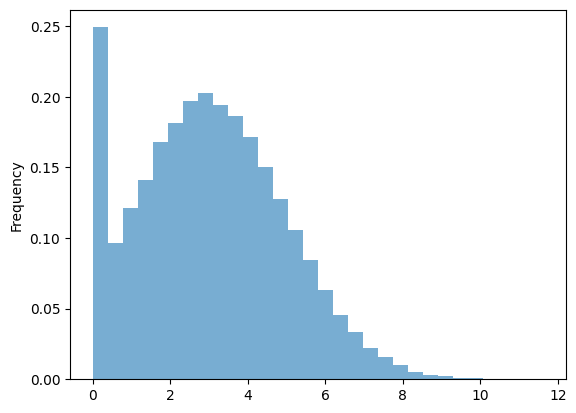

In [54]:
X_train["physical_activity"].plot(kind="hist", density=True, bins=30, alpha=0.6)

<Axes: ylabel='physical_activity'>

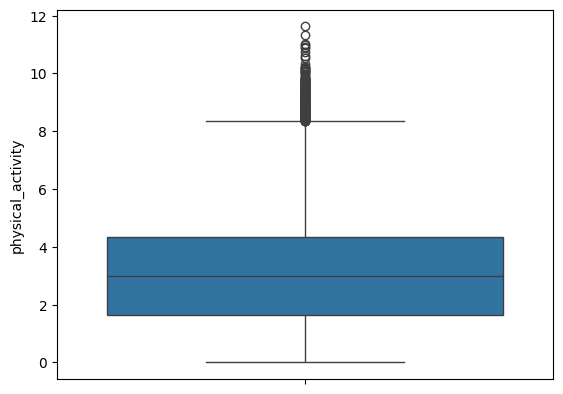

In [55]:
sns.boxplot(data=X_train["physical_activity"])

In [56]:
X_train["physical_activity"].describe()

,physical_activity
count,80000.000000
mean,3.041704
std,1.883662
min,0.000000
25%,1.640395
50%,2.971979
75%,4.328855
max,11.631898


In [57]:
IQR = X_train["physical_activity"].describe()["75%"] - X_train["physical_activity"].describe()["25%"]
L = X_train["physical_activity"].describe()["25%"] - 1.5 * IQR
U = X_train["physical_activity"].describe()["75%"] + 1.5 * IQR
print(L,U)

-2.3922942915913783 8.361544562356867


In [58]:
print("L den küçük veri sayısı:",X_train[X_train["physical_activity"]<L].shape[0])
print("U dan büyük veri sayısı:",X_train[X_train["physical_activity"]>U].shape[0])

L den küçük veri sayısı: 0
U dan büyük veri sayısı: 278


Yapılan istatistiksel analizler ve görselleştirmeler sonucunda, tespit edilen uç değerlerin veri giriş hatası olmadığı, popülasyonun doğal çeşitliliğini yansıtan gerçek ekstrem değerler olduğu saptanmıştır. Veri kaybını önlemek ve modelin bu uç vakaları da öğrenebilmesini sağlamak adına herhangi bir silme işlemi yapılmadan mevcut veri setiyle ilerlemeyi düşünüyorum.

# Filling null/missing values

In [8]:
data_info_df[data_info_df["Missing Value"]!=0]
# boş değerler varken nasıl lineer regresyon yapayım?

,Variable,Total Entry,Missing Value,Missing Ratio,Data Type,Unique Values,# Unique Values,Max Values,Min Values,Variable Structure
0,alcohol_consumption,100000,42387,0.42387,object,[nan 'Regularly' 'Occasionally'],3,-,-,Ordinal
1,caffeine_intake,100000,33261,0.33261,object,['Moderate' 'High' nan],3,-,-,Ordinal
2,exercise_type,100000,24969,0.24969,object,['Strength' 'Cardio' 'Mixed' nan],4,-,-,Nominal
3,insulin,100000,15836,0.15836,float64,[ nan 10.13159744 18.73317943 ... 17.80...,84165,35.46475,-6.79448,Continuous-Ratio
4,heart_rate,100000,14003,0.14003,float64,[60.74982467 66.46369626 76.04321196 ... 56.33...,85998,114.13604,34.74509,Continuous-Ratio
5,gene_marker_flag,100000,10474,0.10474,float64,[ 1. nan],2,1.0,1.0,Nominal
6,income,100000,8470,0.08470,float64,[6759.82171934 6240.51768988 3429.17926628 ......,87873,12029.40935,500.0,Continuous-Ratio
7,daily_steps,100000,8329,0.08329,float64,[13320.94259457 11911.201401 2974.03537534 ...,90935,18064.96954,1000.0,Continuous-Ratio
8,blood_pressure,100000,7669,0.07669,float64,[118.26425414 117.91798577 123.0736977 ... 14...,92332,184.4392,59.12817,Continuous-Ratio


In [9]:
missing_cols = data_info_df[data_info_df["Missing Value"]!=0]["Variable"].to_list()
missing_cols.reverse()
print(missing_cols)

['blood_pressure', 'daily_steps', 'income', 'gene_marker_flag', 'heart_rate', 'insulin', 'exercise_type', 'caffeine_intake', 'alcohol_consumption']


In [10]:
ordinals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Ordinal")]["Variable"].tolist()
nominals = data_info_df[(data_info_df["Data Type"] == "object") & (data_info_df["Variable Structure"] == "Nominal")]["Variable"].tolist()
print("Ordinals:\n",ordinals)
print("Nominals:\n",nominals)

Ordinals:
 ['alcohol_consumption', 'caffeine_intake', 'sleep_quality', 'smoking_level', 'education_level', 'healthcare_access', 'device_usage', 'sunlight_exposure']
Nominals:
 ['exercise_type', 'gender', 'occupation', 'job_type', 'mental_health_support', 'insurance', 'diet_type', 'pet_owner', 'family_history', 'target']


## Numeric Values

### Encoding function

In [11]:
ordinals_map = {
    "alcohol_consumption":{"Occasionally":0,"Regularly":1},
    "caffeine_intake":{"Moderate":0, "High":1},
    "sleep_quality":{'Poor' : 0,'Fair':1,'Good':2,'Excellent':3},
    "smoking_level":{'Non-smoker':0,'Light':1,'Heavy':2},
    "education_level":{'High School':0,'Bachelor':1,'Master':2,'PhD':3},
    "healthcare_access":{'Poor':0,'Moderate':1,'Good':2},
    "device_usage":{'Low':0,'Moderate':1,'High':2},
    "sunlight_exposure":{'Low':0,'Moderate':1,'High':2},
}

def encode(df, excluded_col):
    for col in df.columns:
        if col in ordinals:
            df[col] = df[col].map(ordinals_map[col])
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mode()[0])
        elif col in nominals:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna("Unknown")
        else:
            if col == excluded_col:
                continue
            df[col] = df[col].fillna(df[col].mean())
    df = pd.get_dummies(df, columns=nominals, drop_first=False)
    return df

In [12]:
# imputation for both train and test data
X_train_copy = X_train.copy()
X_train_copy["target"] = y_train
X_test_copy = X_test.copy()
X_test_copy["target"] = y_test

In [13]:
# Mesafe temelli olduğu için veriyi ölçeklendirmek KNN için kritiktir
scaler = StandardScaler()

for col in ['blood_pressure', 'daily_steps', 'income', 'heart_rate', 'insulin']:
    print("-" * 5, col, "-" * 5)

    # 1. Veriyi encode et (sizin fonksiyonunuz)
    Train_encoded_df = encode(X_train_copy.copy(), col)
    Test_encoded_df = encode(X_test_copy.copy(), col)

    # 2. Eğitim ve Test setlerini ayır
    train_data = Train_encoded_df[Train_encoded_df[col].notna()]
    test_data = Train_encoded_df[Train_encoded_df[col].isna()]

    if test_data.empty:
        continue

    X_train_sub = train_data.drop(columns=col)
    y_train_sub = train_data[col]
    X_test_sub = test_data.drop(columns=col)

    # 3. ÖLÇEKLENDİRME (KNN için zorunlu)
    X_train_scaled = scaler.fit_transform(X_train_sub)
    X_test_scaled = scaler.transform(X_test_sub)

    # 4. MODEL: 10 komşulu KNN Regressor
    # weights='distance' parametresi daha yakın komşulara daha fazla önem verir,
    # bu da dağılımı daha da doğallaştırır.
    model = KNeighborsRegressor(n_neighbors=10, weights='distance')
    model.fit(X_train_scaled, y_train_sub)

    print("X_train için Tahmin yapılıyor...")
    y_pred = model.predict(X_test_scaled)

    # 5. Train verisi Yerine koyma
    X_train_copy.loc[X_train_copy[col].isna(), col] = y_pred

    # 6. Test verisi için veri hazırlık
    Test_test_data = Test_encoded_df[Test_encoded_df[col].isna()].drop(columns=col) # test verisinin test verisi
    Test_test_data_scaled = scaler.transform(Test_test_data)

    # 7. Train verisi Yerine koyma
    print("X_test için Tahmin yapılıyor...")
    y_pred2 = model.predict(Test_test_data_scaled)
    X_test_copy.loc[X_test_copy[col].isna(), col] = y_pred2

----- blood_pressure -----
X_train için Tahmin yapılıyor...
X_train için Tahmin yapılıyor...
----- daily_steps -----
X_train için Tahmin yapılıyor...
X_train için Tahmin yapılıyor...
----- income -----
X_train için Tahmin yapılıyor...
X_train için Tahmin yapılıyor...
----- heart_rate -----
X_train için Tahmin yapılıyor...
X_train için Tahmin yapılıyor...
----- insulin -----
X_train için Tahmin yapılıyor...
X_train için Tahmin yapılıyor...


In [14]:
X_train_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,33801
caffeine_intake,26587
exercise_type,19944
gender,0
weight,0
bmi,0
waist_size,0
height,0


In [15]:
X_test_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,8586
caffeine_intake,6674
exercise_type,5025
gender,0
weight,0
bmi,0
waist_size,0
height,0


### Exercise Type

In [16]:
X_train_copy["exercise_type"] = X_train_copy["exercise_type"].fillna("Missing")
X_test_copy["exercise_type"] = X_test_copy["exercise_type"].fillna("Missing")

In [17]:
X_train_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,33801
caffeine_intake,26587
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


In [18]:
X_test_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,8586
caffeine_intake,6674
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


### Caffeine intake

TBI + ME

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
Train_encoded_df = encode(X_train_copy.copy(),"caffeine_intake")
encoded_Train = Train_encoded_df[Train_encoded_df["caffeine_intake"].notna()]
encoded_X_train = encoded_Train.drop(columns="caffeine_intake")
encoded_y_train = encoded_Train["caffeine_intake"]
encoded_Test = Train_encoded_df[Train_encoded_df["caffeine_intake"].isna()]
encoded_X_test = encoded_Test.drop(columns="caffeine_intake")

In [21]:
model = DecisionTreeClassifier(max_depth=6,random_state=13)
model.fit(encoded_X_train, encoded_y_train)
y_pred = model.predict(encoded_X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
Train_encoded_df.loc[Train_encoded_df["caffeine_intake"].isna(), "caffeine_intake"] = y_pred
Train_encoded_df["caffeine_intake"].value_counts()

,count
caffeine_intake,
1.0,46964
0.0,33036


In [23]:
X_train_copy["caffeine_intake"].value_counts()

,count
caffeine_intake,
High,26846
Moderate,26567


In [24]:
X_train_copy["caffeine_intake"] = Train_encoded_df["caffeine_intake"].map({0:"Moderate", 1:"High"})

now lets make imputation for test data as well

In [25]:
Test_encoded_df = encode(X_test_copy.copy(),"caffeine_intake")
encoded_Test = Test_encoded_df[Test_encoded_df["caffeine_intake"].isna()].drop(columns="caffeine_intake")

In [26]:
y_pred2 = model.predict(encoded_Test)

In [27]:
Test_encoded_df.loc[Test_encoded_df["caffeine_intake"].isna(), "caffeine_intake"] = y_pred2
Test_encoded_df["caffeine_intake"].value_counts()

,count
caffeine_intake,
1.0,11557
0.0,8443


In [28]:
X_test_copy["caffeine_intake"].value_counts()

,count
caffeine_intake,
Moderate,6804
High,6522


In [29]:
X_test_copy["caffeine_intake"] = Test_encoded_df["caffeine_intake"].map({0:"Moderate", 1:"High"})

In [30]:
X_train_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,33801
survey_code,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


In [31]:
X_test_copy.isna().sum().sort_values(ascending=False).head(8)

,0
alcohol_consumption,8586
survey_code,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


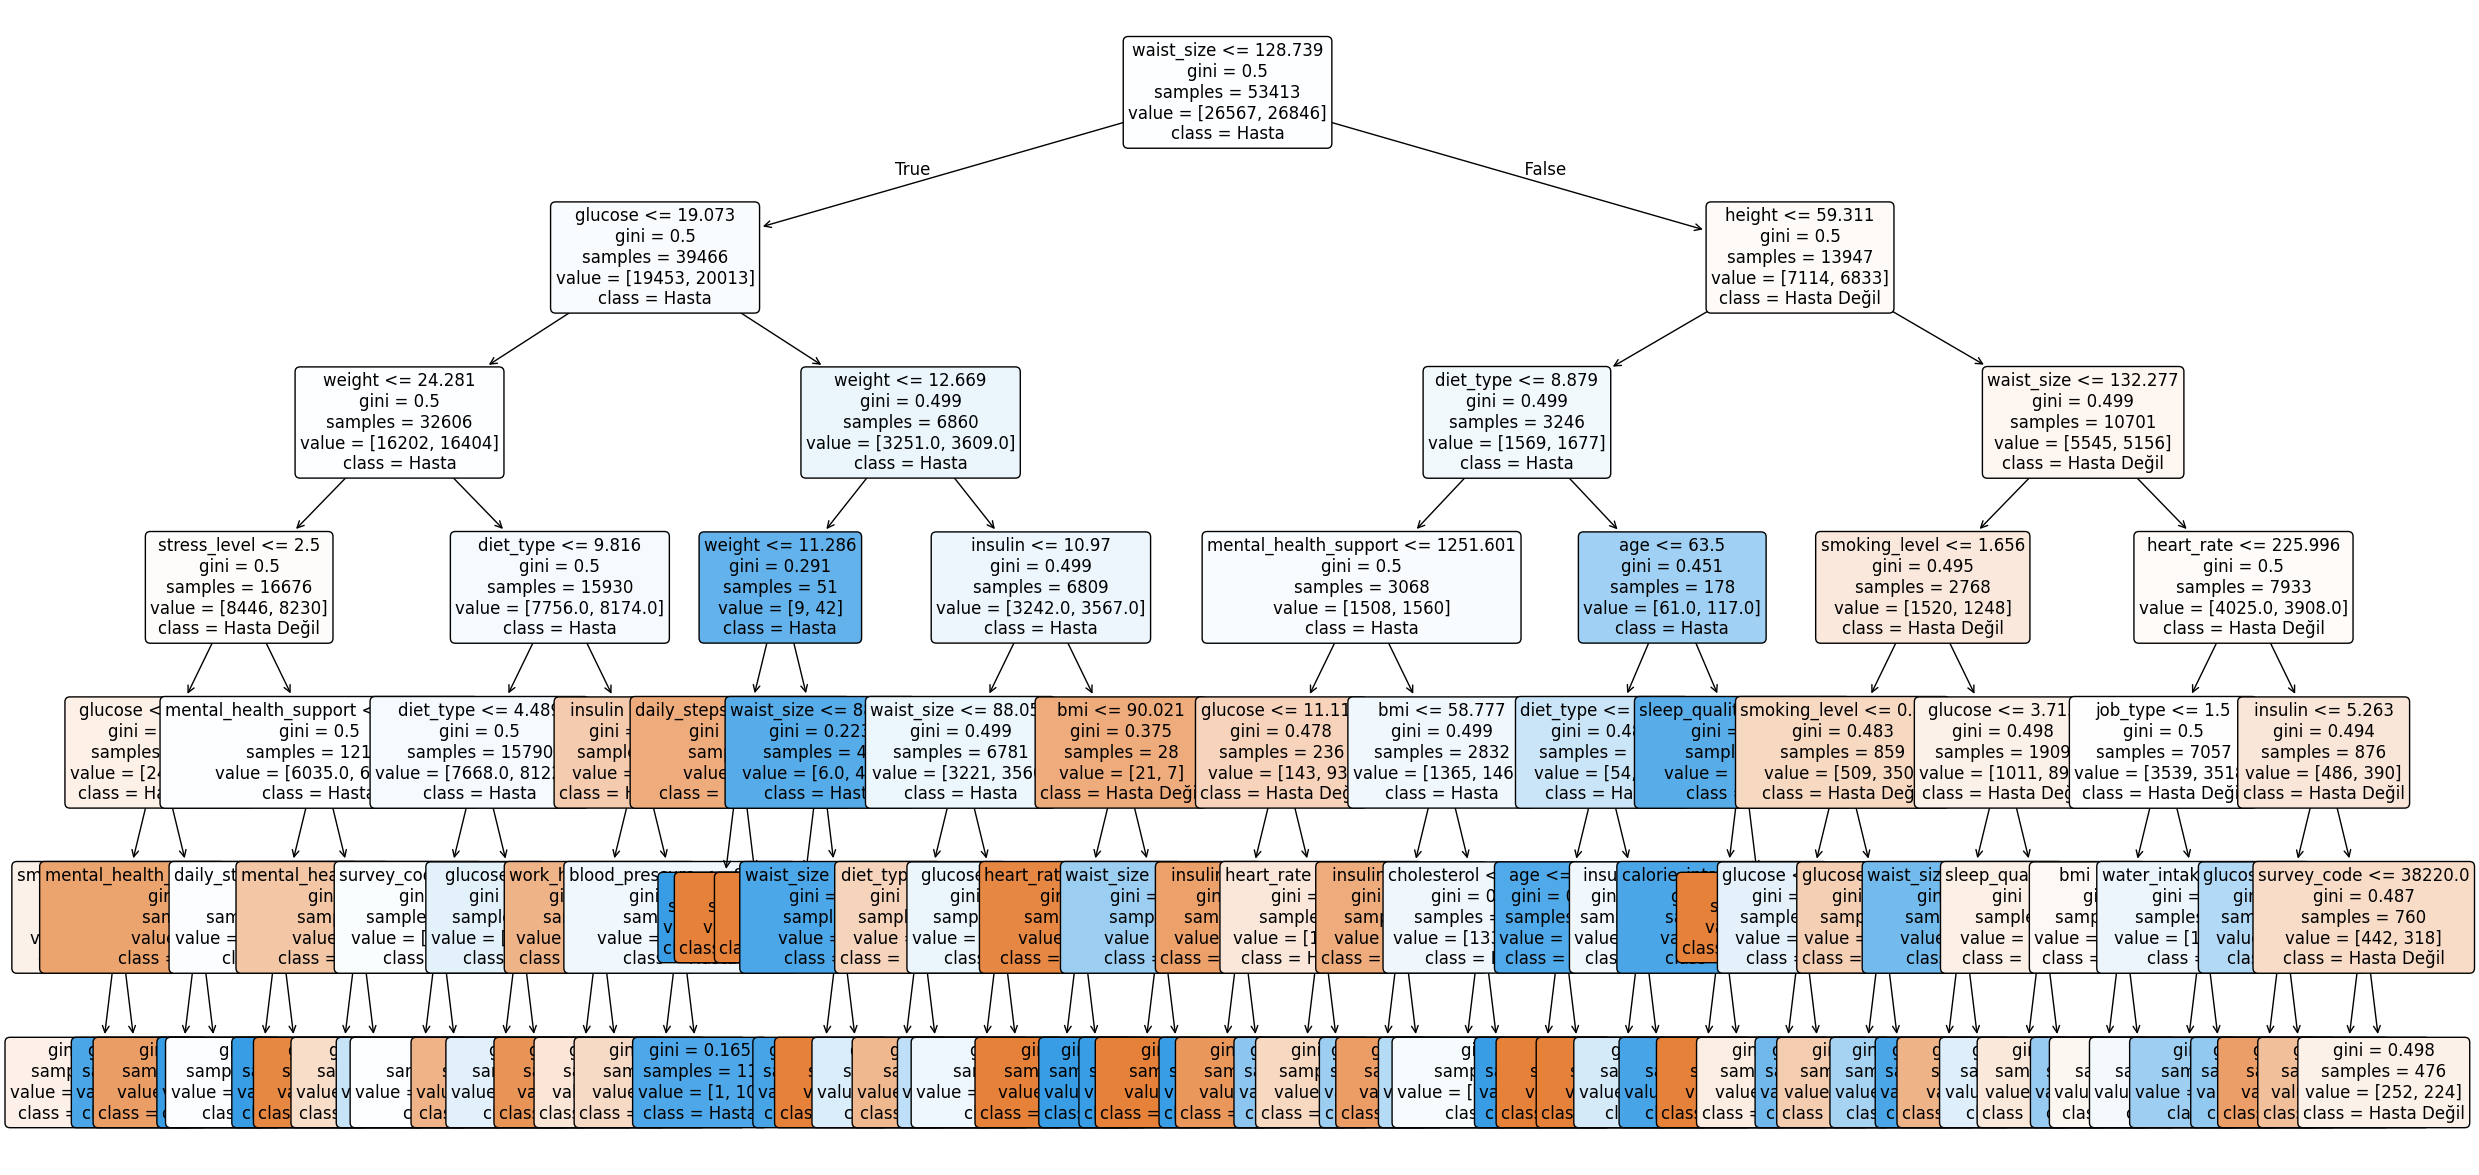

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15)) # Boyutu ağacın derinliğine göre ayarlayabilirsin
plot_tree(model,
          feature_names=X_train.columns,
          class_names=['Hasta Değil', 'Hasta'], # Hedef değişkenine göre
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

### Alcohol Consumption

In [33]:
Train_encoded_df = encode(X_train_copy.copy(),"alcohol_consumption")
encoded_Train = Train_encoded_df[Train_encoded_df["alcohol_consumption"].notna()]
encoded_X_train = encoded_Train.drop(columns="alcohol_consumption")
encoded_y_train = encoded_Train["alcohol_consumption"]
encoded_Test = Train_encoded_df[Train_encoded_df["alcohol_consumption"].isna()]
encoded_X_test = encoded_Test.drop(columns="alcohol_consumption")

In [34]:
model = DecisionTreeClassifier(max_depth=6,random_state=13)
model.fit(encoded_X_train, encoded_y_train)
y_pred = model.predict(encoded_X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [36]:
Train_encoded_df.loc[Train_encoded_df["alcohol_consumption"].isna(), "alcohol_consumption"] = y_pred
Train_encoded_df["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
0.0,40809
1.0,39191


In [37]:
X_train_copy["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
Occasionally,23110
Regularly,23089


In [41]:
X_train_copy["alcohol_consumption"] = Train_encoded_df["alcohol_consumption"].map({0:"Moderate", 1:"High"})

In [38]:
Test_encoded_df = encode(X_test_copy.copy(),"alcohol_consumption")
encoded_Test = Test_encoded_df[Test_encoded_df["alcohol_consumption"].isna()].drop(columns="alcohol_consumption")
y_pred2 = model.predict(encoded_Test)

In [39]:
Test_encoded_df.loc[Test_encoded_df["alcohol_consumption"].isna(), "alcohol_consumption"] = y_pred2
Test_encoded_df["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
0.0,10179
1.0,9821


In [40]:
X_test_copy["alcohol_consumption"].value_counts()

,count
alcohol_consumption,
Occasionally,5721
Regularly,5693


In [42]:
X_test_copy["alcohol_consumption"] = Test_encoded_df["alcohol_consumption"].map({0:"Moderate", 1:"High"})

In [43]:
X_train_copy.isna().sum().sort_values(ascending=False).head(8)

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


In [44]:
X_test_copy.isna().sum().sort_values(ascending=False).head(8)

,0
survey_code,0
age,0
gender,0
height,0
weight,0
bmi,0
waist_size,0
blood_pressure,0


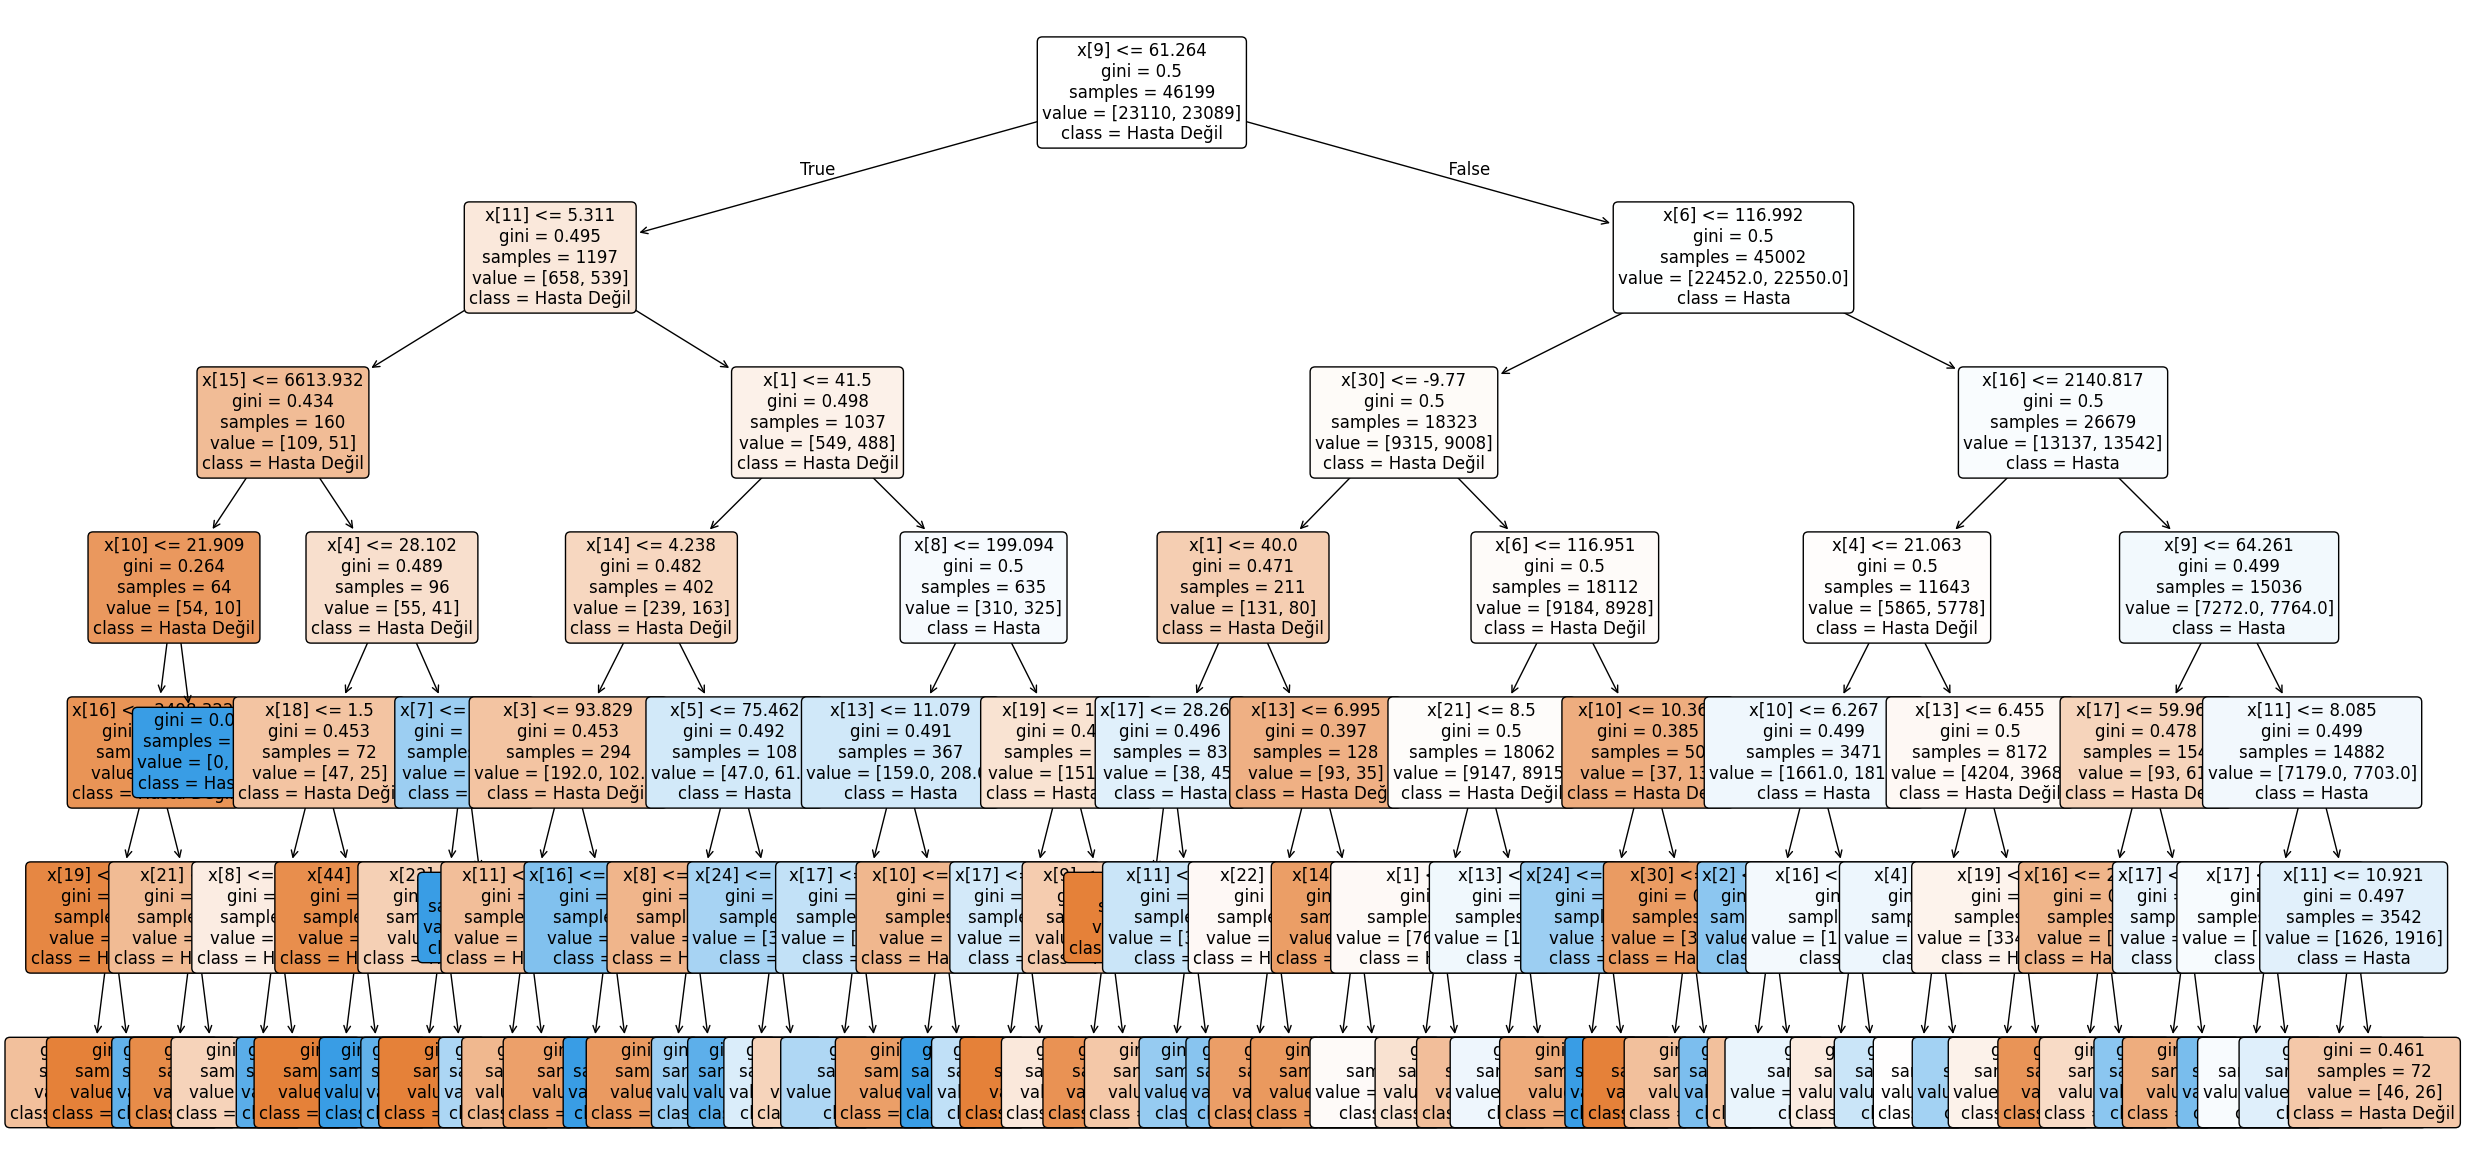

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15)) # Boyutu ağacın derinliğine göre ayarlayabilirsin
plot_tree(model,
          class_names=['Hasta Değil', 'Hasta'], # Hedef değişkenine göre
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

## No Missing Values!

lets check the distribution of our copy data

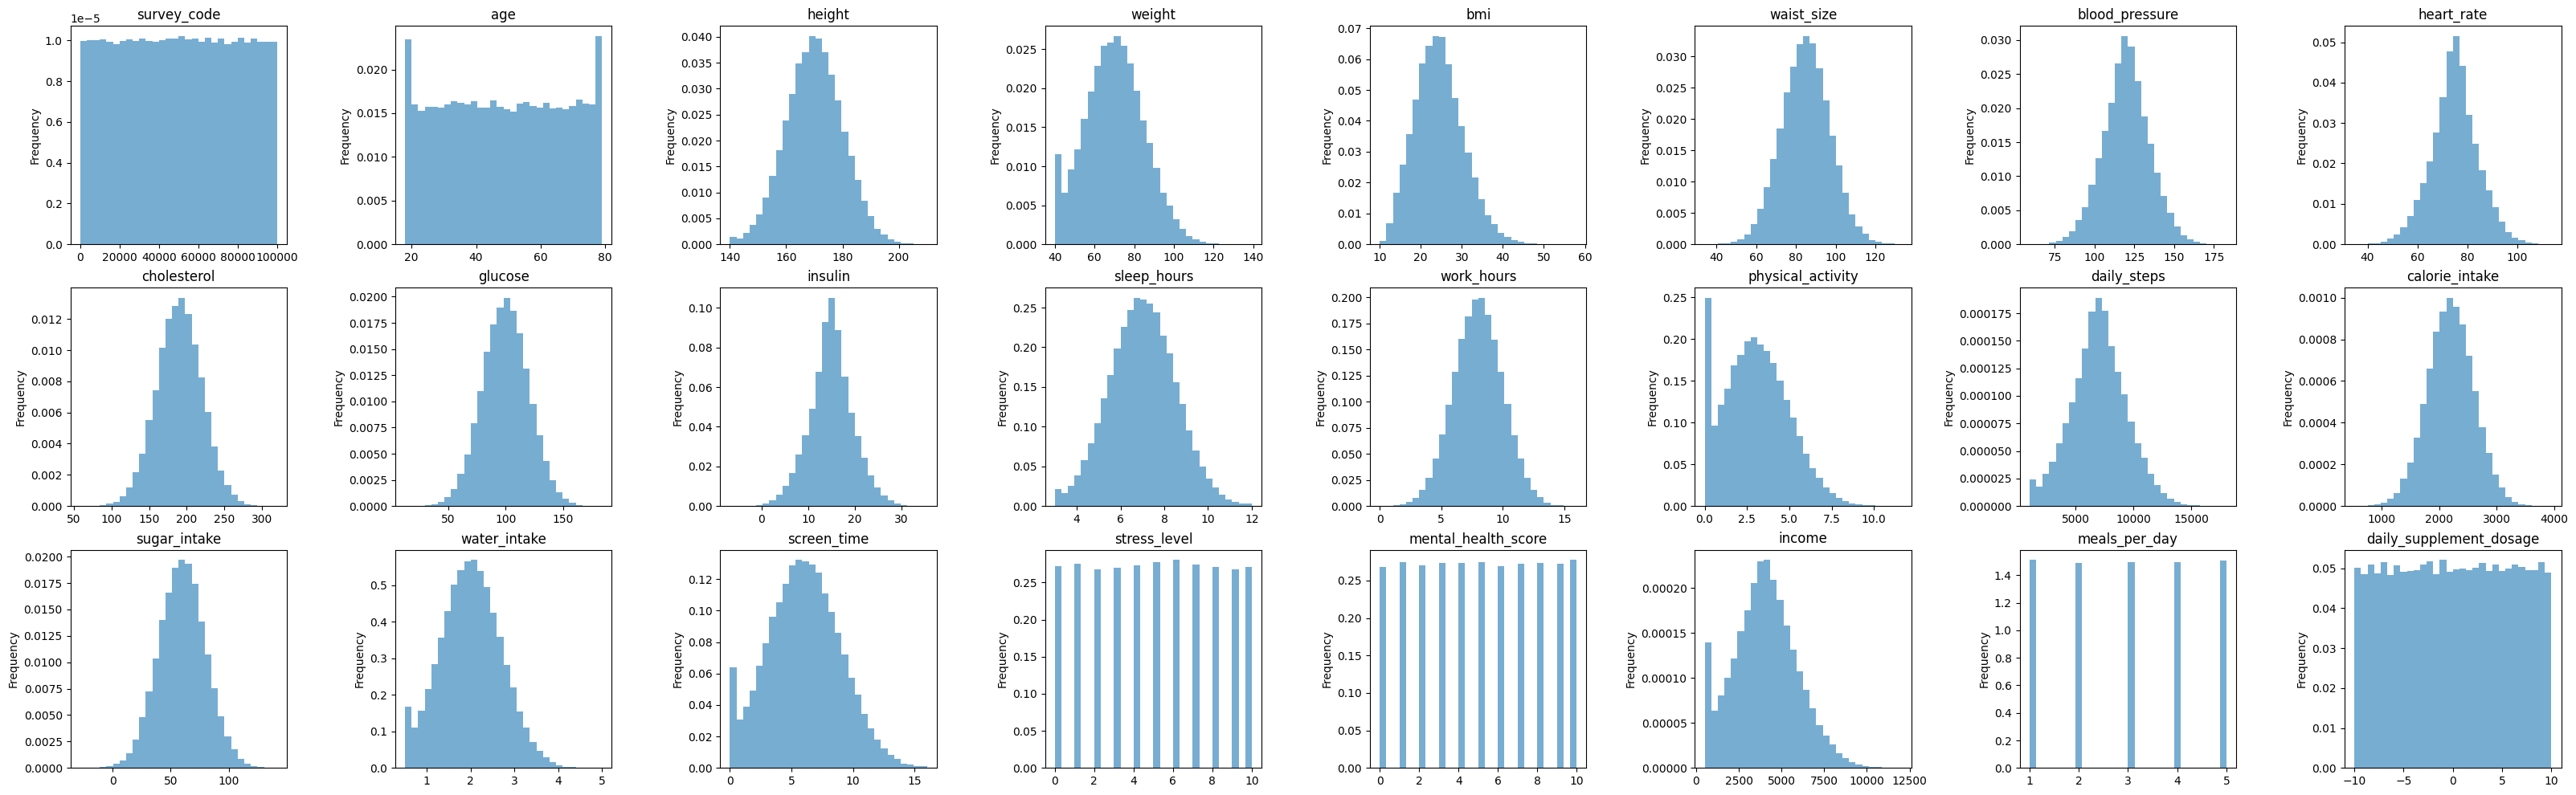

In [48]:
numerics = X_train_copy.select_dtypes(include="number").columns

# for continuous/cardinal columns
fig, axs = plt.subplots(3, 8, figsize=(40, 12))
axs = axs.flatten()

for ax, col in zip(axs, numerics):
    X_train_copy[col].plot(kind="hist", density=True, bins=30, alpha=0.6, ax=ax)
    ax.set_title(col)
plt.subplots_adjust(wspace=0.5)

In [50]:
X_train = X_train_copy.drop(columns="target")
X_test = X_test_copy.drop(columns="target")
y_train = X_train_copy["target"]
y_test = X_test_copy["target"]

In [51]:
X_train.to_csv("X_train.csv", index=True)
X_test.to_csv("X_test.csv", index=True)
y_train.to_csv("y_train.csv", index=True)
y_test.to_csv("y_test.csv", index=True)

# Model training